In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
btc_data = pd.read_csv("BTC-USD.csv")
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-06,658.299988,661.830017,636.219971,648.260010,648.260010,1367401
1,2014-03-07,648.260010,655.200012,600.309998,616.729980,616.729980,1498290
2,2014-03-08,616.729980,625.679993,588.580017,609.210022,609.210022,1335982
3,2014-03-09,609.210022,637.599976,598.510010,627.049988,627.049988,1209993
4,2014-03-10,627.049988,633.679993,594.700012,612.969971,612.969971,1648979


In [11]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
Date         1827 non-null object
Open         1827 non-null float64
High         1827 non-null float64
Low          1827 non-null float64
Close        1827 non-null float64
Adj Close    1827 non-null float64
Volume       1827 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


In [12]:
btc_data["Average"] = (btc_data["High"] + btc_data["Low"])/2
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Average
0,2014-03-06,658.299988,661.830017,636.219971,648.260010,648.260010,1367401,649.024994
1,2014-03-07,648.260010,655.200012,600.309998,616.729980,616.729980,1498290,627.755005
2,2014-03-08,616.729980,625.679993,588.580017,609.210022,609.210022,1335982,607.130005
3,2014-03-09,609.210022,637.599976,598.510010,627.049988,627.049988,1209993,618.054993
4,2014-03-10,627.049988,633.679993,594.700012,612.969971,612.969971,1648979,614.190002


Text(0, 0.5, 'BTC Average Price')

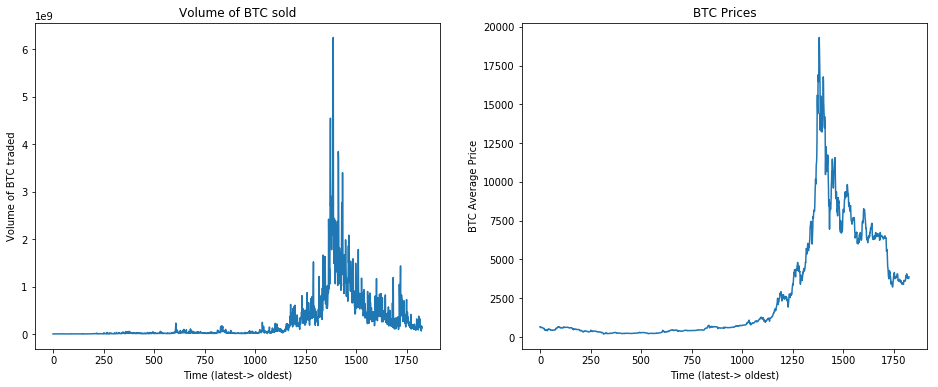

In [13]:
input_features = btc_data.iloc[:,[6,7]].values
input_data = input_features

fig, ax = plt.subplots(1,2,figsize=(16, 6))
ax[0].plot(input_features[:,0])
ax[0].set_title("Volume of BTC sold")
ax[0].set_xlabel("Time (latest-> oldest)")
ax[0].set_ylabel("Volume of BTC traded")

ax[1].plot(input_features[:,1])
ax[1].set_title("BTC Price")
ax[1].set_xlabel("Time (latest-> oldest)")
ax[1].set_ylabel("BTC Average Price")



In [14]:
from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_features[:,:])

In [15]:
lookback= 50
test_size=365
X_tmp=[]
y=[]

for i in range(lookback, len(btc_data)):
    X_tmp.append(input_data[i-lookback:i, :])
    
y = input_data[lookback:-test_size,1]

X_tmp, y = np.array(X_tmp), np.array(y)
X = X_tmp[:-test_size,:]
X_test = X_tmp[-test_size:]

X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape, y.shape)
print(X_test.shape)


(1412, 50, 2) (1412,)
(365, 50, 2)


In [16]:
from keras import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [17]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(Dropout(0.2))

model.add(LSTM(units=30, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=30))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.add(Dropout(0.2))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 30)            3960      
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
1412/1412 [==============================] - 5s 4ms/step - loss: 0.0061
Epoch 2/100
1412/1412 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 3/100
1412/1412 [==============================] - 3s 2ms/step - loss: 0.0012
Epoch 4/100
1412/1412 [==============================] - 3s 2ms/step - loss: 9.8840e-04
Epoch 5/100
1412/1412 [==============================] - 4s 2ms/step - loss: 0.0011
Epoch 6/100
1412/1412 [==============================] - 4s 3ms/step - loss: 8.4963e-04
Epoch 7/100
1412/1412 [==============================] - 4s 3ms/step - loss: 9.1640e-04
Epoch 8/100
1412/1412 [==============================] - 4s 3ms/step - loss: 9.2900e-04
Epoch 9/100
1412/1412 [==============================] - 4s 3ms/step - loss: 7.5552e-04
Epoch 10/100
1412/1412 [==============================] - 4s 3ms/step - loss: 6.5603e-04
Epoch 11/100
1412/1412 [==============================] - 4s 3ms/step - loss: 6.6769e-04
Epoch 12/100
1412/1412 [======================

In [20]:
predicted_value= model.predict(X_test)

1.9810398518337626


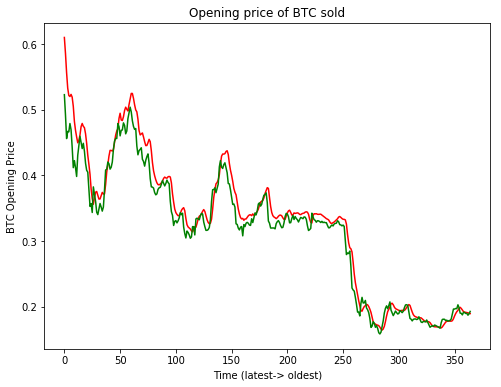

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

true_value = input_data[-test_size:,1]

plt.plot(predicted_value, color= 'red')
plt.plot(true_value, color='green')
plt.title("Opening price of BTC sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("BTC Opening Price")

rms_error = np.mean(np.square(predicted_value - true_value))
print(rms_error*100)
